<a href="https://colab.research.google.com/github/alisterpage/CHEM3580-Jupyter-Notebooks/blob/main/harmonic_vs_morse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipympl -q 2>&1 >/dev/null


The equilibrium bond length of the H$_{2}$ molecule is 0.751 $\mathring A$, and the bond dissociation energy is 436 kJ/mol. The potential energy surface of the H$_{2}$ molecule can be modelled in different ways, i.e.:

 1. Using a <font color='blue'>harmonic potential energy surface: $U_{\text{stretch}} = k(\Delta R)^2$.</font> (*The single variable that defines this potential is the harmonic force constant $k$.*)
 
 2. Using a <font color='red'>Morse potential energy surface: $U_{\text{stretch}} = D(1 - e^{-\alpha\Delta R})^2$.</font> (*This potential requires 2 variables, $D$ (the H$_{2}$ bond dissociation enthalpy) and $\alpha$ (defined by the equation $\alpha = \sqrt{\frac{k}{2D}}$*))

The widget below plots both of these potentials for the H$_{2}$ model on the same graph. Using the 3 slider bars, vary the values of $k$, $D$ and $\alpha$ to answer the following questions. 

1. Describe the physical property/properties that each of the parameters $k$, $D$ and $\alpha$ describe. 

2. Why is the Morse potential more physically realistic than the harmonic potential? (*Hint - what is the bond dissociation energy of this molecule according to the harmonic potential?*)

3. Molecular dynamics almost always relies on harmonic potentials to describe bond stretching, rather than more accurate potentials such as the Morse potential. Can you explain why? (Consider how different the two potentials are at energies typical of molecular vibration, e.g. ~ 40 kJ/mol. *You may want to rescale the y-axis of the graph. Do this by changing* ```# ax.set_ylim()``` *and re-running the cell below.*)


interactive(children=(IntSlider(value=0, description='k', max=1500), IntSlider(value=0, description='D', max=6…

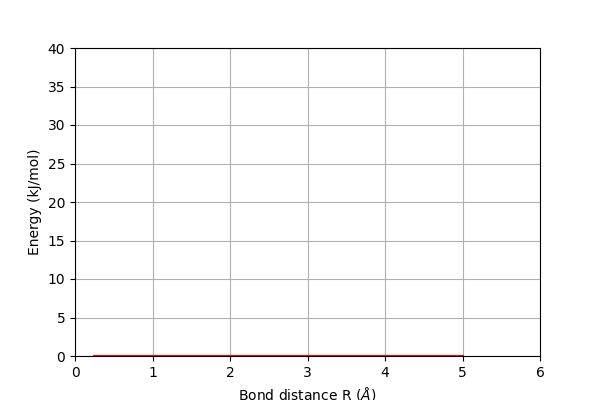

In [3]:
#@title
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()

# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylim([0, 40])
ax.set_xlim([0,6])
ax.set_ylabel("Energy (kJ/mol)")
ax.set_xlabel("Bond distance R ($\AA$)")
ax.grid(True)
 
# generate x values
x = np.linspace(0.251, 5, 100)
xmin=0.751
 
    
def harmonic(k, x, xmin):
    """
    Return a harmonic potential for x with force constant k
    """
    return k*(x-xmin)**2

def morse(D,alpha,x,xmin):
    """
    Return a morse potential for x with constants D, a
    """
    return D*(1-np.exp(-alpha*(x-xmin)))**2
 
 
@widgets.interact(k=(0, 500, 1), D=(0, 100, 1), alpha=(0, 3, 0.1))
def update(k = 0, D=0, alpha=0):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax.lines]
    ax.plot(x, harmonic(k,x,xmin),color='blue')
    ax.plot(x, morse(D,alpha,x,xmin),color='red')